In [1]:
print('hello world')

hello world


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib

In [4]:
import time
time.sleep(3)

In [5]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Tim')

'Hello, Tim!'

In [6]:
import numpy as np
def square(x):
    return x * x

In [7]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

2 squared is 4


In [8]:
print('Is %d squared %d?' % (x, y))

Is 2 squared 4?


In [9]:
y = 10
print('Is %d squared is %d?' % (x, y))

Is 2 squared is 10?


In [10]:
df = pd.read_csv('fortune500.csv')

In [11]:
!pip install numpy

In [12]:
import numpy as np

In [13]:
n = np.array((1,2,3))
print(n)

[1 2 3]


In [14]:
print(type(n))

<class 'numpy.ndarray'>


In [15]:
!pip install pandas

In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [19]:
sns.set(style="darkgrid")

In [20]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [21]:
df = pd.read_csv('fortune500.csv')

In [22]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

In [24]:
df.head()

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47


In [25]:
df.head()

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47


In [26]:
schools = df.School
schools[0]

'MIT'

In [27]:
df = pd.read_csv('fortune500.csv')

In [28]:
%pwd

'/Users/kaitlinsharkey'

In [29]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [30]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [31]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [32]:
len(df)

25500

In [33]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [34]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [35]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [36]:
len(df.profit[non_numberic_profits])

369

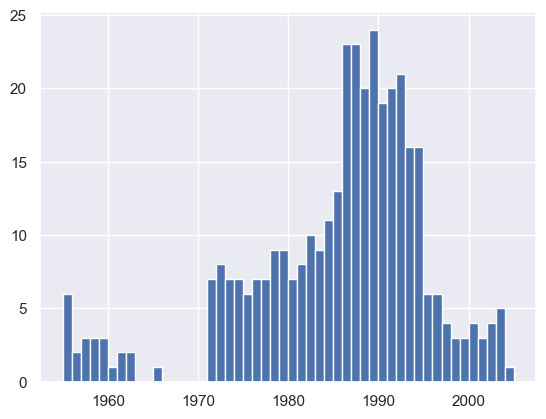

In [37]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [38]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [39]:
len(df)

25131

In [40]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [41]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

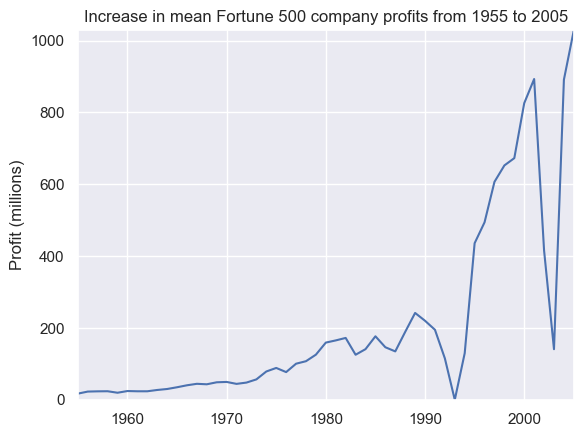

In [42]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

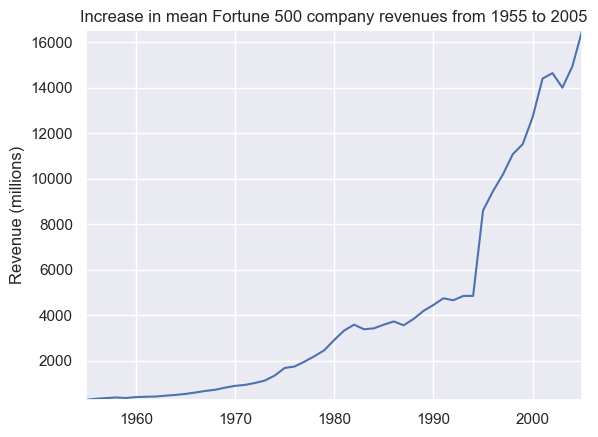

In [43]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

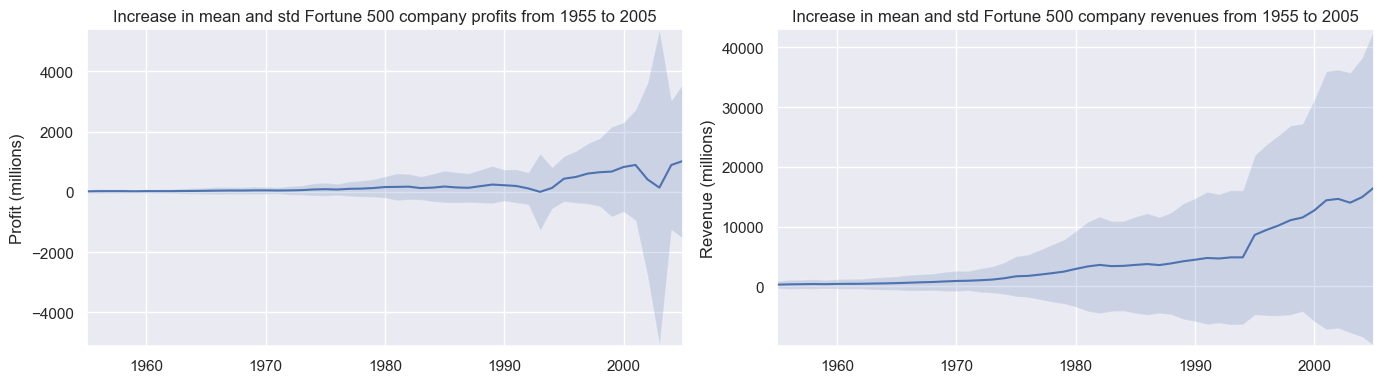

In [44]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nbconvert